In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [32]:
df = pd.read_csv('Corrupted2_60_small.csv')

In [33]:
df

,Unnamed: 0,Mystery_Data_X,Mystery_Data_Y,Modified
0,0,143.292953,978.939780,True
1,1,80.523981,81.891216,False
2,2,98.703222,1065.490227,True
3,3,129.861942,117.817454,False
4,4,80.658517,2239.977681,True
...,...,...,...,...
9995,9995,167.404367,111.930927,False
9996,9996,118.069964,95.176680,False
9997,9997,116.545783,494.279239,True
9998,9998,129.807868,76.094646,False


In [34]:
df = df.fillna(0)

In [35]:
df = df.drop('Unnamed: 0',axis=1)
df

,Mystery_Data_X,Mystery_Data_Y,Modified
0,143.292953,978.939780,True
1,80.523981,81.891216,False
2,98.703222,1065.490227,True
3,129.861942,117.817454,False
4,80.658517,2239.977681,True
...,...,...,...
9995,167.404367,111.930927,False
9996,118.069964,95.176680,False
9997,116.545783,494.279239,True
9998,129.807868,76.094646,False


In [36]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.4),max_features=1.0)
model.fit(df[['Mystery_Data_Y']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.4, n_estimators=50)

In [37]:
df['scores']=model.decision_function(df[['Mystery_Data_Y']])
df['anomaly']=model.predict(df[['Mystery_Data_Y']])
y_pred=model.predict(df[['Mystery_Data_Y']])
df.head(20)

,Mystery_Data_X,Mystery_Data_Y,Modified,scores,anomaly
0,143.292953,978.939780,True,-0.008127,-1
1,80.523981,81.891216,False,0.061858,1
2,98.703222,1065.490227,True,0.003078,1
3,129.861942,117.817454,False,0.099407,1
4,80.658517,2239.977681,True,-0.265672,-1
5,120.387921,0.000000,True,0.013850,1
6,128.735339,127.886463,False,0.092680,1
7,112.396668,604.160446,True,-0.013153,-1
8,140.698051,924.104152,True,-0.008806,-1
9,103.234252,1449.265453,True,-0.119673,-1


In [38]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

      Mystery_Data_X  Mystery_Data_Y  Modified    scores  anomaly
0         143.292953      978.939780      True -0.008127       -1
4          80.658517     2239.977681      True -0.265672       -1
7         112.396668      604.160446      True -0.013153       -1
8         140.698051      924.104152      True -0.008806       -1
9         103.234252     1449.265453      True -0.119673       -1
...              ...             ...       ...       ...      ...
9984       90.232865     1688.431179      True -0.147560       -1
9986      158.718663     2088.835918      True -0.237537       -1
9990      156.738635     1828.132216      True -0.167170       -1
9991      102.301426     1018.190388      True -0.004176       -1
9997      116.545783      494.279239      True -0.018482       -1

[3993 rows x 5 columns]


In [39]:
import pandas as pd

In [40]:
read = df

In [41]:
outlier_idx = read.index[read.anomaly==-1]

In [42]:
outliers = outlier_idx

In [43]:
arr = read.index.isin(outliers)

In [44]:
arr

array([ True, False, False, ...,  True, False, False])

In [45]:
data = pd.DataFrame(arr, columns =['Model'])

In [46]:
data

,Model
0,True
1,False
2,False
3,False
4,True
...,...
9995,False
9996,False
9997,True
9998,False


In [47]:
data.to_csv('check.csv')

In [48]:
import pandas as pd

In [49]:
read = pd.read_csv('Corrupted2_60_small_IF.csv')
read

,Unnamed: 0,Mystery_Data_X,Mystery_Data_Y,Modified,Model
0,0,143.292953,978.939780,True,True
1,1,80.523981,81.891216,False,False
2,2,98.703222,1065.490227,True,True
3,3,129.861942,117.817454,False,False
4,4,80.658517,2239.977681,True,True
...,...,...,...,...,...
9995,9995,167.404367,111.930927,False,False
9996,9996,118.069964,95.176680,False,False
9997,9997,116.545783,494.279239,True,True
9998,9998,129.807868,76.094646,False,False


In [50]:
l = len(read['Modified'])
l

10000

In [51]:
count3 = 0
count4 = 0
for i in range(0,l):
  if(read['Modified'][i] == True and read['Model'][i] == True):
    count3 = count3 + 1
  elif(read['Modified'][i] == False and read['Model'][i] == False):
    count3 = count3 + 1
  else:
    count4 = count4 + 1 
accuracy = count3/l
accuracy

0.8298

In [52]:
count3 = 0
count4 = 0
for i in range(0,l):
  if(read['Modified'][i] == True):
    count3 = count3 + 1
    if(read['Model'][i] == True):
      count4 = count4 + 1
acc = count4/count3
acc 

0.7175312381673609

In [53]:
count6 = 0
count5 = 0
for i in range(0,l):
  if(read['Model'][i] == True):
      count6 = count6 + 1
for i in range(0,l):
  if(read['Modified'][i] == True):
    if(read['Model'][i] == True):
      count5 = count5 + 1 
precision = count5/count6
precision  

0.9475

In [54]:
count7 = 0
count8 = 0
for i in range(0,l):
  if(read['Modified'][i] == False):
    count8 = count8 + 1
    if(read['Model'][i] == False):
      count7 = count7 + 1
sensitivity = count7/count8    
sensitivity

0.9554896142433235

In [55]:
f1_score = 2*acc*precision/(acc+precision)
f1_score

0.8166343460461107

In [56]:
import numpy as np

In [57]:
read = read.fillna(0)

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(read)
X_pca = pca.transform(read)

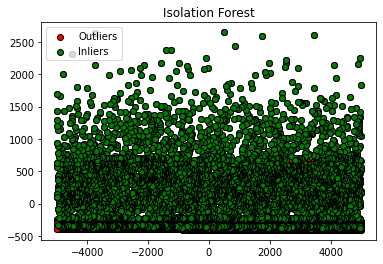

In [61]:
lofs_index = np.where(y_pred!=1)
values = X_pca[lofs_index]
plt.title("Isolation Forest")
plt.scatter(X_pca[:,0], X_pca[:,1], color='r',edgecolors='black',label="Outliers")
plt.scatter(values[:,0],values[:,1], color='green', edgecolors='black',label="Inliers")
plt.legend(loc="upper left")
plt.show()